In [1]:
%pylab inline

import os, paper_style

Populating the interactive namespace from numpy and matplotlib


In [2]:
idir = os.path.expandvars("$master/notebooks/data/G05Indexes")

lsindx6 = [loadtxt("{}/m{}2.7lsindx_sed".format(idir,i)) for i in xrange(3,8)]
lsindx7 = [loadtxt("{}/m{}2.6lsindx_sed".format(idir,i)) for i in xrange(3,8)]
ABcolor = [loadtxt("{}/m{}2.1ABmag".format(idir,i)) for i in xrange(3,8)]

Mg2Fe = lambda Mg2, Fe4531, Fe5015: 0.6*Mg2 + 0.4*log10(abs(Fe4531+Fe5015))
MgFep = lambda Mgb, Fe5270, Fe5335: sqrt(abs(Mgb*(0.72*Fe5270 + 0.28*Fe5335)))

kw_indx = [
    r"\bf \log{t/\text{yr}}",
    r"\bf D$4000$",
    r"\bf H$\beta$",
    r"\bf H$\delta_A$+H$\gamma_A$",
    r"\bf [Mg${}_2$Fe]",
    r"\bf [MgFe]'",
    r"\bf u-r"
]
indexes = {}
for i in xrange(len(lsindx6)):
    indexes["m{}2".format(i+3)] = {
        kw_indx[0]: lsindx6[i][:,0],
        kw_indx[1]: lsindx7[i][:,13],
        kw_indx[2]: lsindx6[i][:,9],
        kw_indx[3]: lsindx7[i][:,9] + lsindx7[i][:,10],
        kw_indx[4]: Mg2Fe(lsindx6[i][:,12],lsindx6[i][:,7],lsindx6[i][:,10]),
        kw_indx[5]: MgFep(lsindx6[i][:,13],lsindx7[i][:,1],lsindx7[i][:,2]),
        kw_indx[6]: ABcolor[i][:,3]+ABcolor[i][:,4]
    }
kw_modl = sorted(indexes.keys())

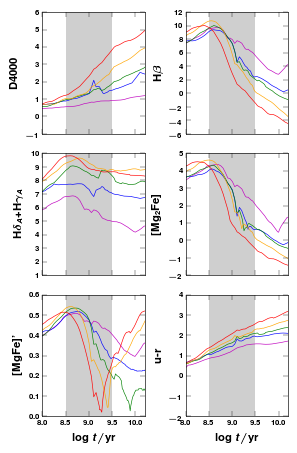

In [3]:
cl_modl = "m b g orange r".split()#cm.rainbow(range(len(kw_modl)))

fig, axs = subplots(3, 2, sharex=True, figsize=(3.3,5))
xlim(8.0,10.2)

axs = axs.ravel()
for i in xrange(axs.size):
    for j, modl in enumerate(kw_modl):
        axs[i].plot(indexes[modl][kw_indx[0]], indexes[modl][kw_indx[i+1]], color=cl_modl[j], lw=0.5)
        axs[i].axvspan(8.5, 9.5, lw=0, fc="0.8", alpha=0.4)
        
    if axs[i].is_last_row(): axs[i].set_xlabel(kw_indx[0])
    axs[i].set_ylabel(kw_indx[i+1])

fig.tight_layout()
fig.subplots_adjust(wspace=0.4)